In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_summary_220708.csv")
df

,archetype,baseline_eir,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,received_primaquine,...,interval,itn_coverage,hs_rate,within_school_coverage,out_of_school_rate,target_age_range,smc_on,ivermectin,primaquine,smc_age_range
0,Central,1,0,0.0,6020.0,4388.8,0.0,0.0,0.0,0.0,...,term,default,0.8,0.9,0.00,default,False,False,False,default
1,Central,3,0,0.0,5934.2,4751.8,0.0,0.0,0.0,0.0,...,term,default,0.8,0.9,0.00,default,False,False,False,default
2,Central,10,0,0.0,6271.2,6570.2,0.0,0.0,0.0,0.0,...,term,default,0.8,0.9,0.00,default,False,False,False,default
3,Central,30,0,0.0,6115.6,7664.4,0.0,0.0,0.0,0.0,...,term,default,0.8,0.9,0.00,default,False,False,False,default
4,Central,100,0,0.0,6222.2,9609.0,0.0,0.0,0.0,0.0,...,term,default,0.8,0.9,0.00,default,False,False,False,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,Southern,1,55,0.0,5753.0,682.8,0.0,0.0,0.0,0.0,...,term,default,0.8,1.0,0.15,default,False,False,False,default
876,Southern,3,55,0.0,5917.2,1910.8,0.0,0.0,0.0,0.0,...,term,default,0.8,1.0,0.15,default,False,False,False,default
877,Southern,10,55,0.0,5753.6,3109.0,0.0,0.0,0.0,0.0,...,term,default,0.8,1.0,0.15,default,False,False,False,default
878,Southern,30,55,0.0,5874.8,4542.8,0.0,0.0,0.0,0.0,...,term,default,0.8,1.0,0.15,default,False,False,False,default


In [3]:
# Cost vs cases averted

In [4]:
df.columns

Index(['archetype', 'baseline_eir', 'scenario_number', 'iptsc_rdts_used',
       'iptsc_drugs_used', 'cases_treated', 'severe_cases_treated',
       'received_smc', 'received_ivermectin', 'received_primaquine', 'pfpr0_5',
       'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'Run_Number', 'cases_treated_BASELINE',
       'clinical_incidence0_5_BASELINE', 'clinical_incidence2_10_BASELINE',
       'clinical_incidence6_15_BASELINE', 'clinical_incidence16_500_BASELINE',
       'clinical_incidence_all_BASELINE', 'frac_averted_clinical_0_5',
       'frac_averted_clinical_2_10', 

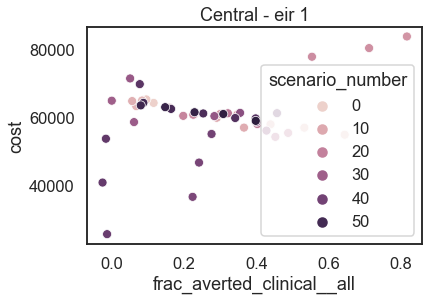

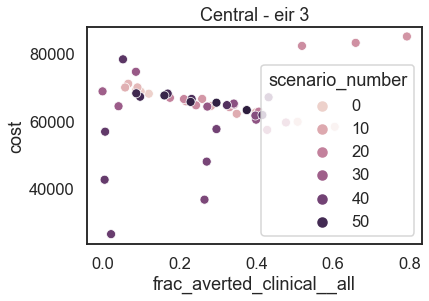

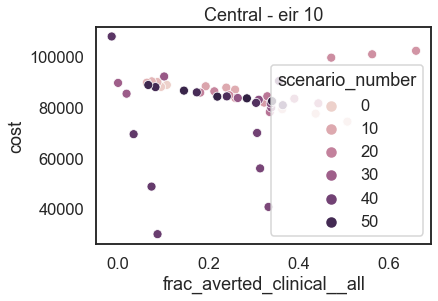

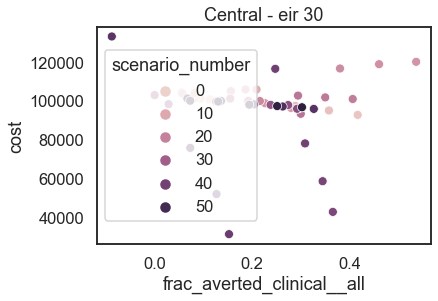

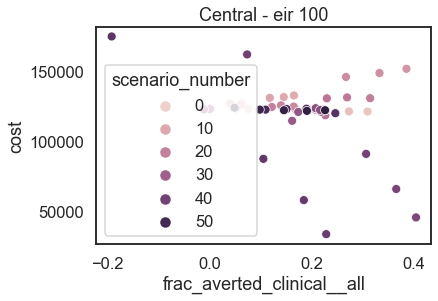

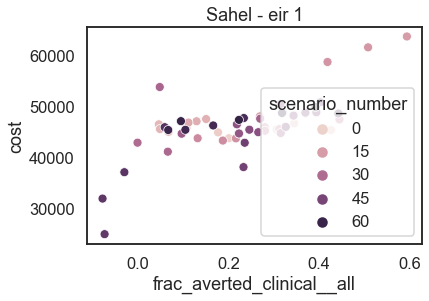

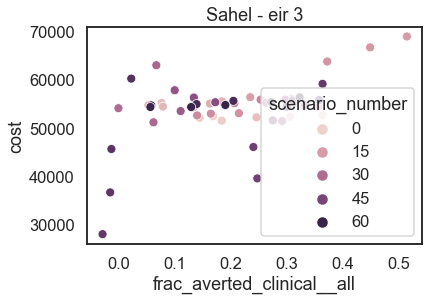

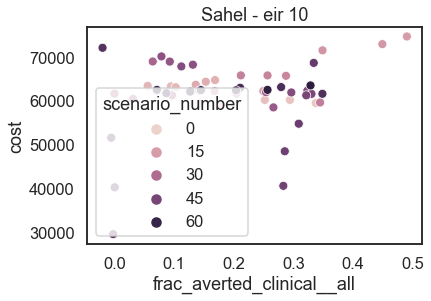

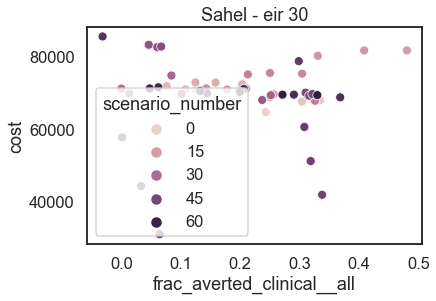

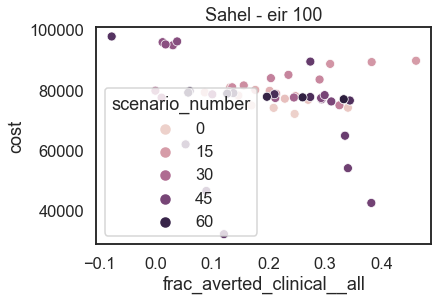

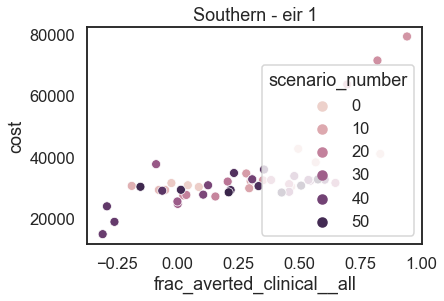

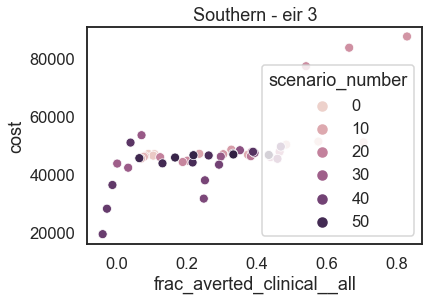

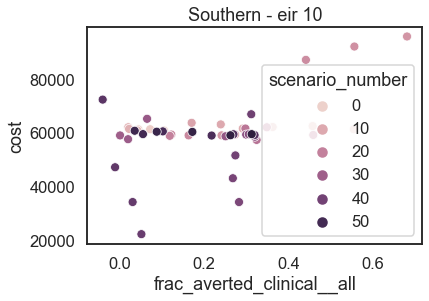

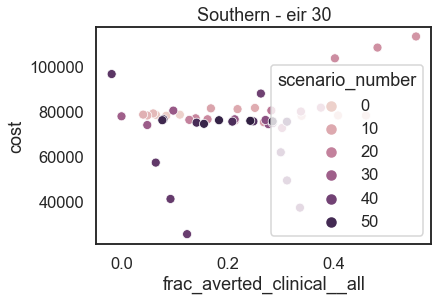

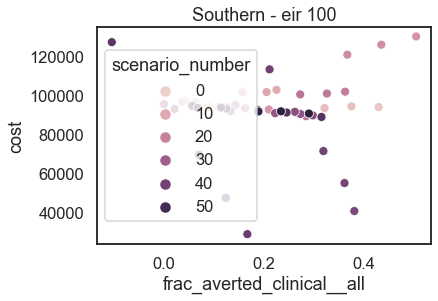

In [5]:
sdf = df[df["interval"] != "day"]
for a, ssdf in sdf.groupby(["archetype", "baseline_eir"]):
    plt.figure()
    sns.scatterplot(data=ssdf, x="frac_averted_clinical__all", y="cost", hue="scenario_number")
    plt.title(f"{a[0]} - eir {a[1]}") 

In [6]:
def find_frontier(df):
    rows_to_keep = []
    for i in range(len(df)):
        this_row = df.iloc[i].to_dict()
        not_this_row = df.drop([i], axis=0)

        cost = this_row["cost"]
        efficacy = this_row["frac_averted_clinical__all"]

        more_efficient = np.logical_and(not_this_row["cost"] <= cost, not_this_row["frac_averted_clinical__all"] > efficacy)
        if np.sum(more_efficient) > 0:
            pass
        else:
            rows_to_keep.append(this_row)

    return pd.DataFrame(rows_to_keep)

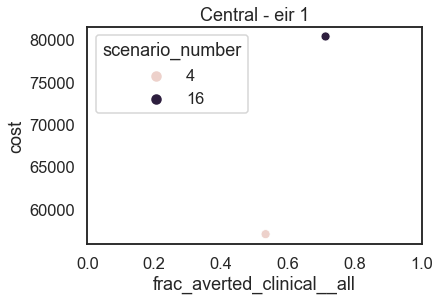

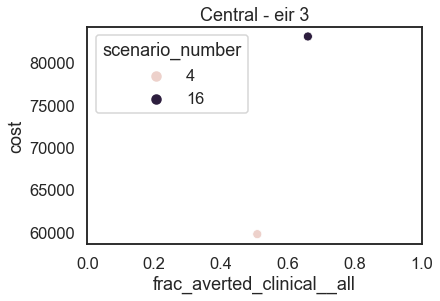

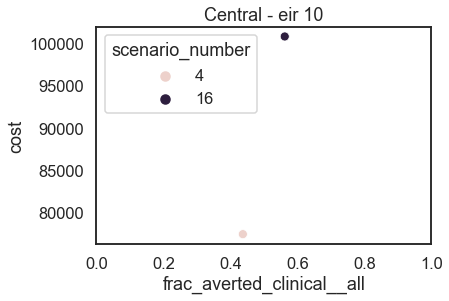

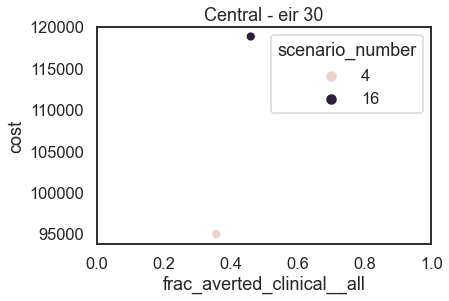

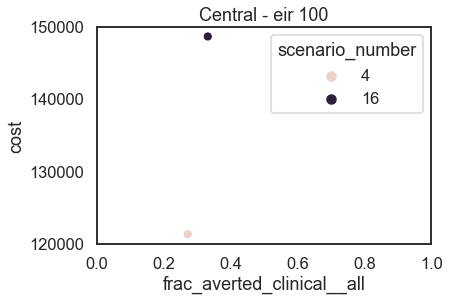

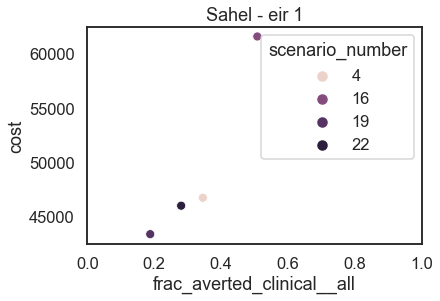

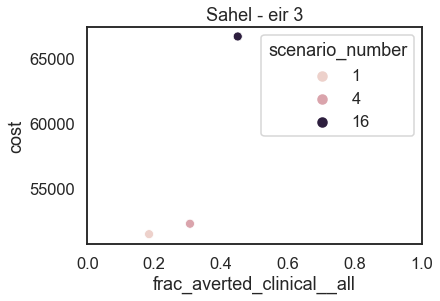

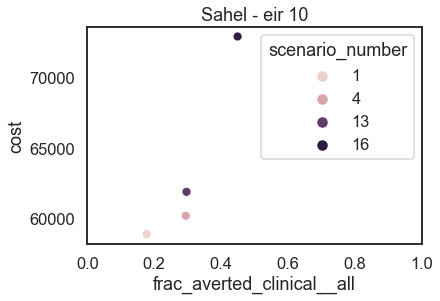

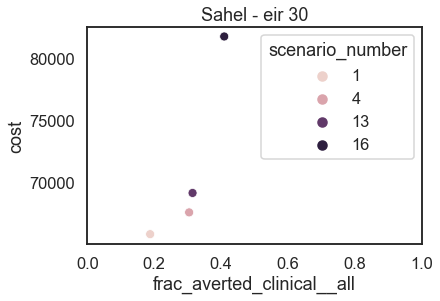

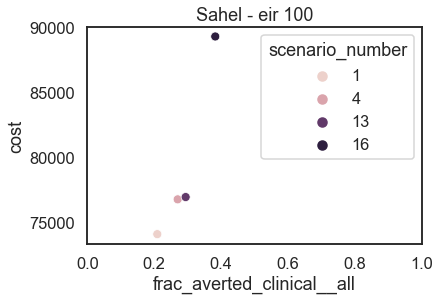

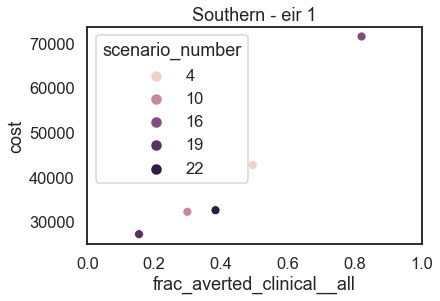

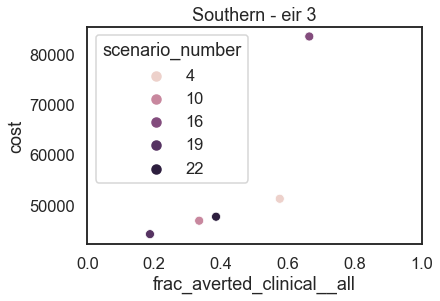

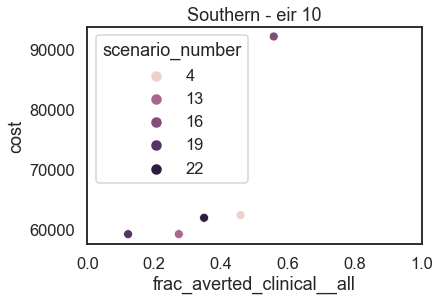

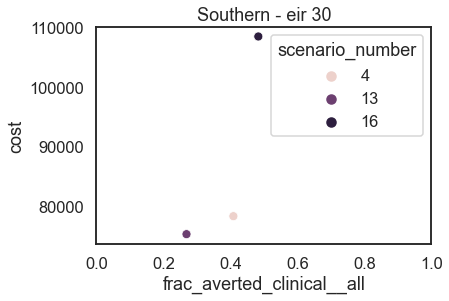

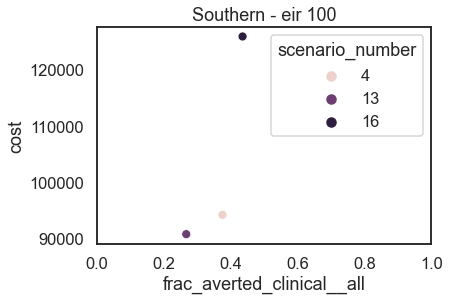

In [7]:
save_df_list = []
sdf = df[np.logical_and.reduce([df["interval"] != "day",
                                df["hs_rate"] == 0.8,
                                df["itn_coverage"] == "default",
                                df["within_school_coverage"] == 0.9,
                                df["out_of_school_rate"] == 0.15,
                                df["target_age_range"] == "default",
                                df["ivermectin"] == False,
                                df["primaquine"] == False,
                                df["smc_age_range"] == "default"])]
for a, ssdf in sdf.groupby(["archetype", "baseline_eir"]):
    if a[0] == "Sahel":
        ssdf = ssdf[ssdf["smc_on"] == True]
        ssdf = ssdf[ssdf["scenario_number"] != 42] # 42 is repetition of 13
    to_reduce = ssdf.reset_index(drop=True)
    
    print_df = find_frontier(to_reduce)
    save_df_list.append(print_df)
    
    plt.figure()
    sns.scatterplot(data=print_df,x="frac_averted_clinical__all", y="cost", hue="scenario_number")
    plt.title(f"{a[0]} - eir {a[1]}") 
    plt.xlim([0,1.0])
df_reduced = pd.concat(save_df_list)

Explore few cases where scenario 13 is eliminated

Text(0.5, 1.0, 'Sahel')

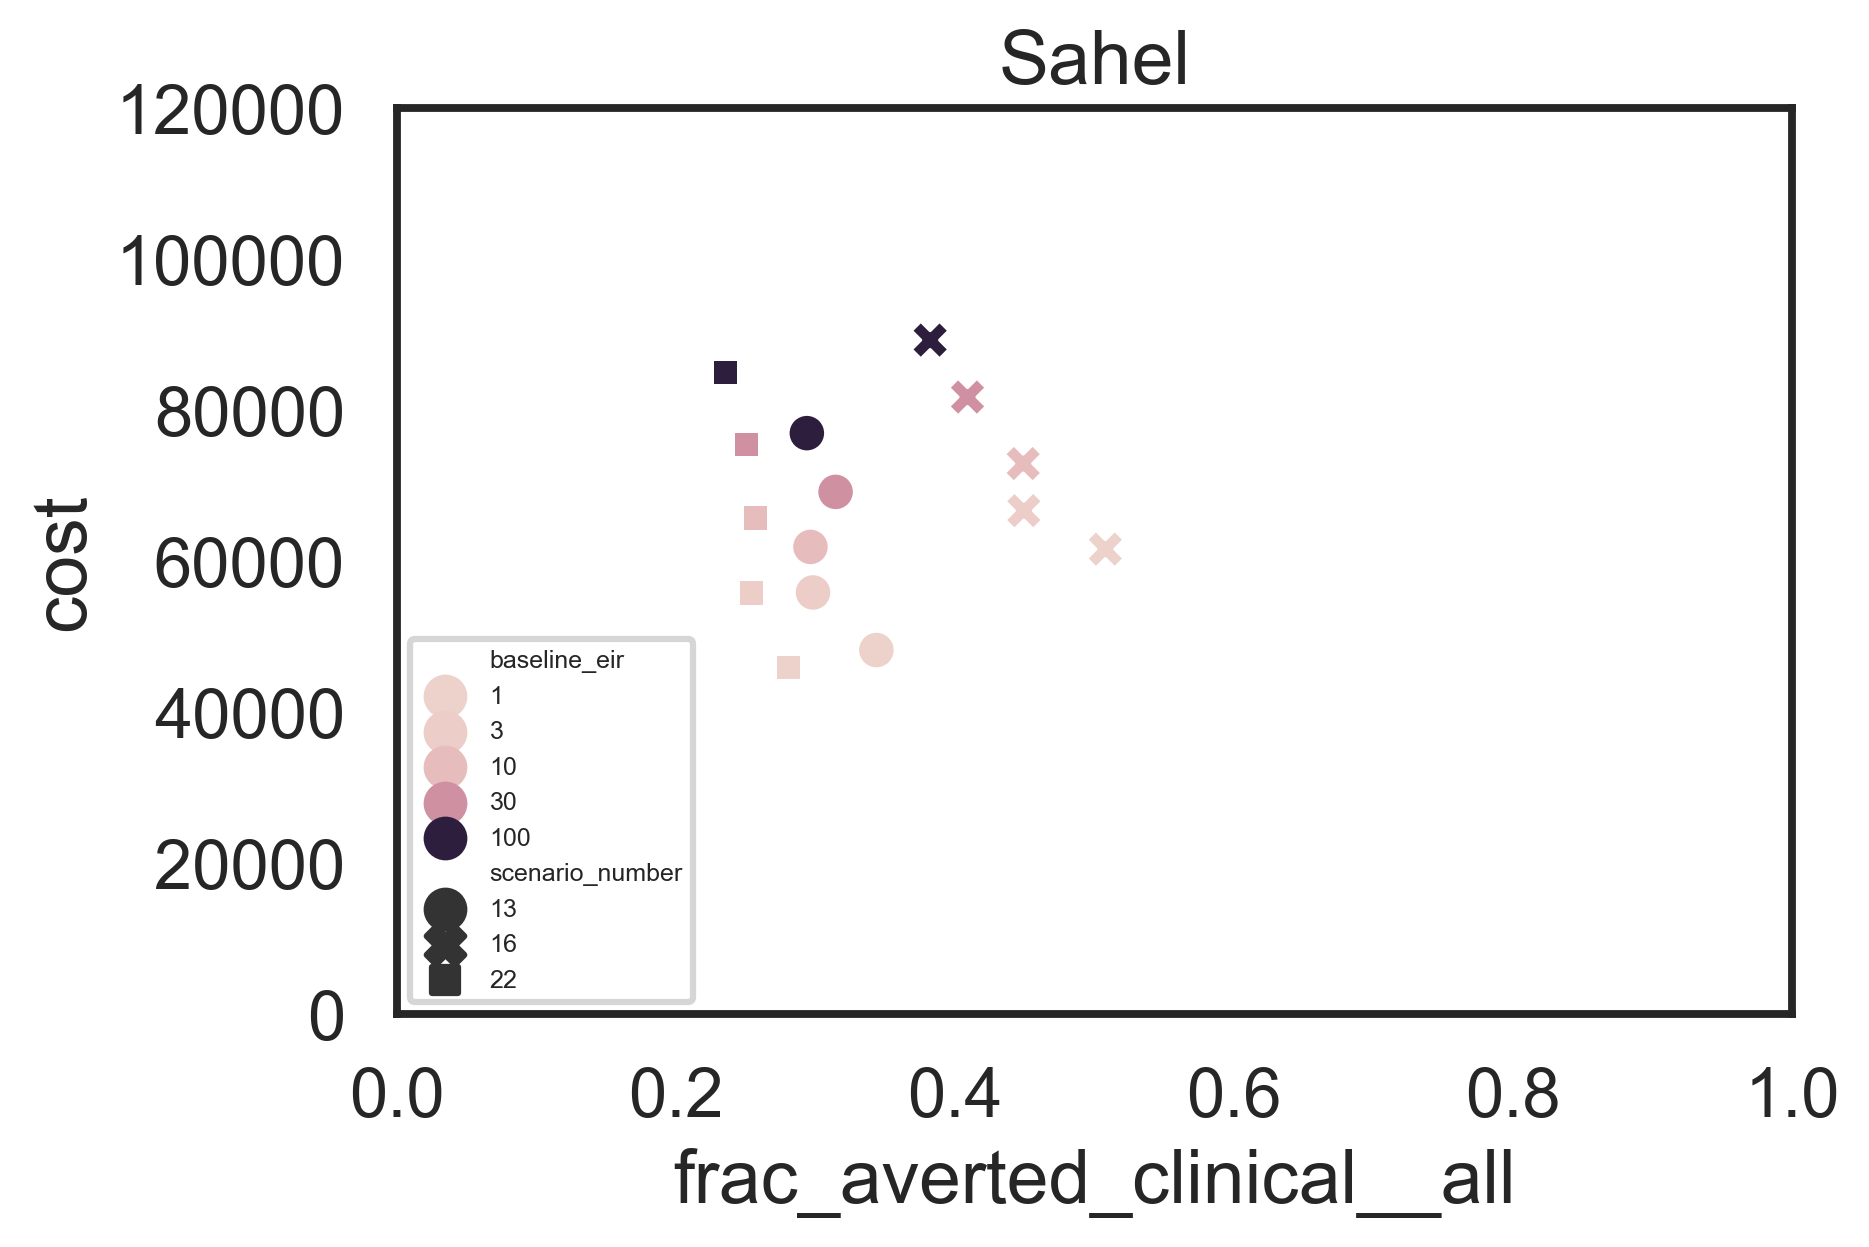

In [8]:
df_investigate = df[np.logical_and.reduce([df["archetype"]=="Sahel",
                                           np.in1d(df["scenario_number"], [13,16,22])])]
df_investigate = df_investigate[["baseline_eir", "scenario_number", "cost", "frac_averted_clinical__all"]]
df_investigate

plt.figure(dpi=300)
sns.scatterplot(data=df_investigate, x="frac_averted_clinical__all", y="cost", style="scenario_number", hue="baseline_eir")
plt.legend(fontsize=6, loc=3)
plt.xlim([0,1.0])
plt.ylim([0,120000])
plt.title("Sahel")

Text(0.5, 1.0, 'Southern')

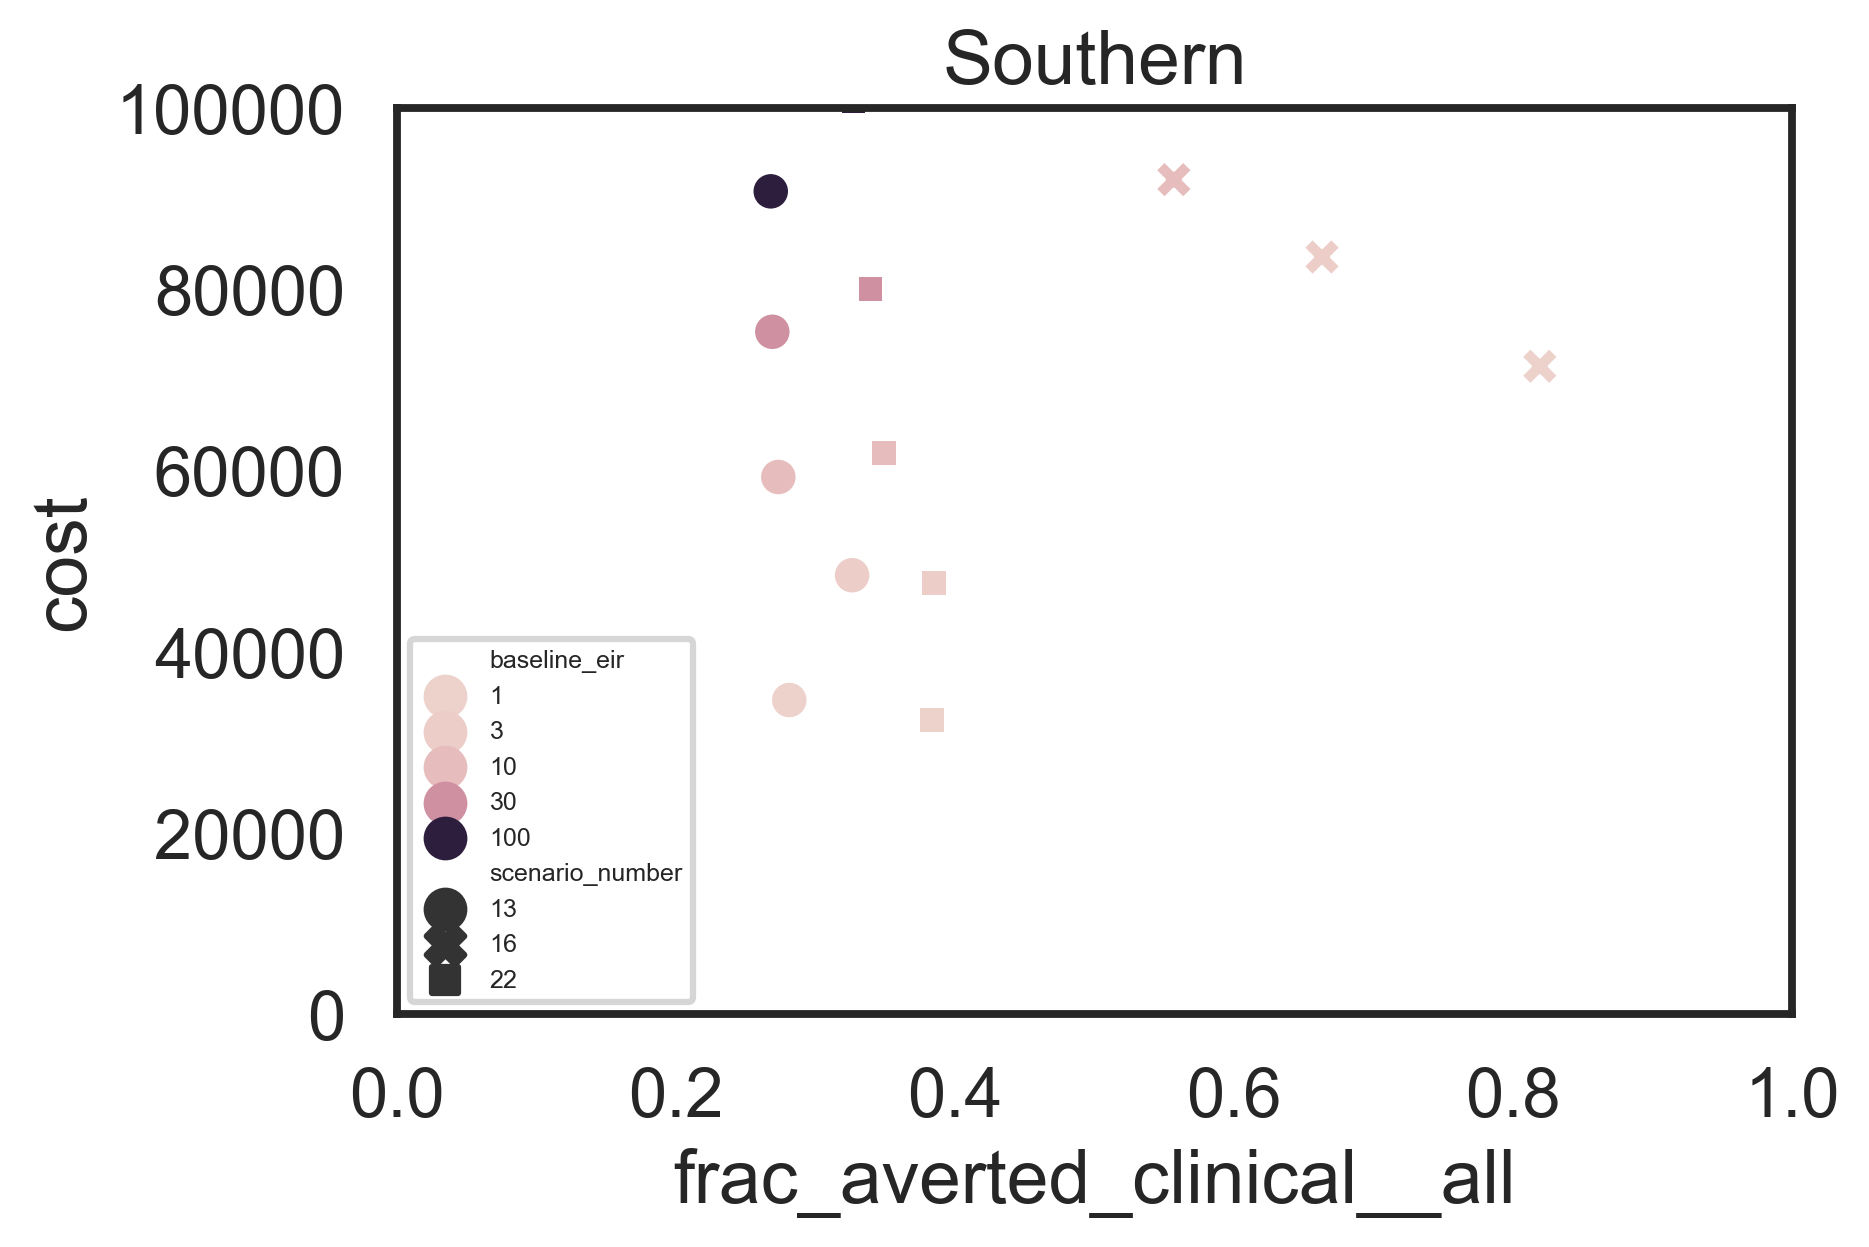

In [9]:
df_investigate = df[np.logical_and.reduce([df["archetype"]=="Southern",
                                           np.in1d(df["scenario_number"], [13,16,22])])]
df_investigate = df_investigate[["baseline_eir", "scenario_number", "cost", "frac_averted_clinical__all"]]
df_investigate

plt.figure(dpi=300)
sns.scatterplot(data=df_investigate, x="frac_averted_clinical__all", y="cost", style="scenario_number", hue="baseline_eir")
plt.legend(fontsize=6, loc=3)
plt.xlim([0,1.0])
plt.ylim([0,100000])
plt.title("Southern")

Text(0.5, 1.0, 'Central')

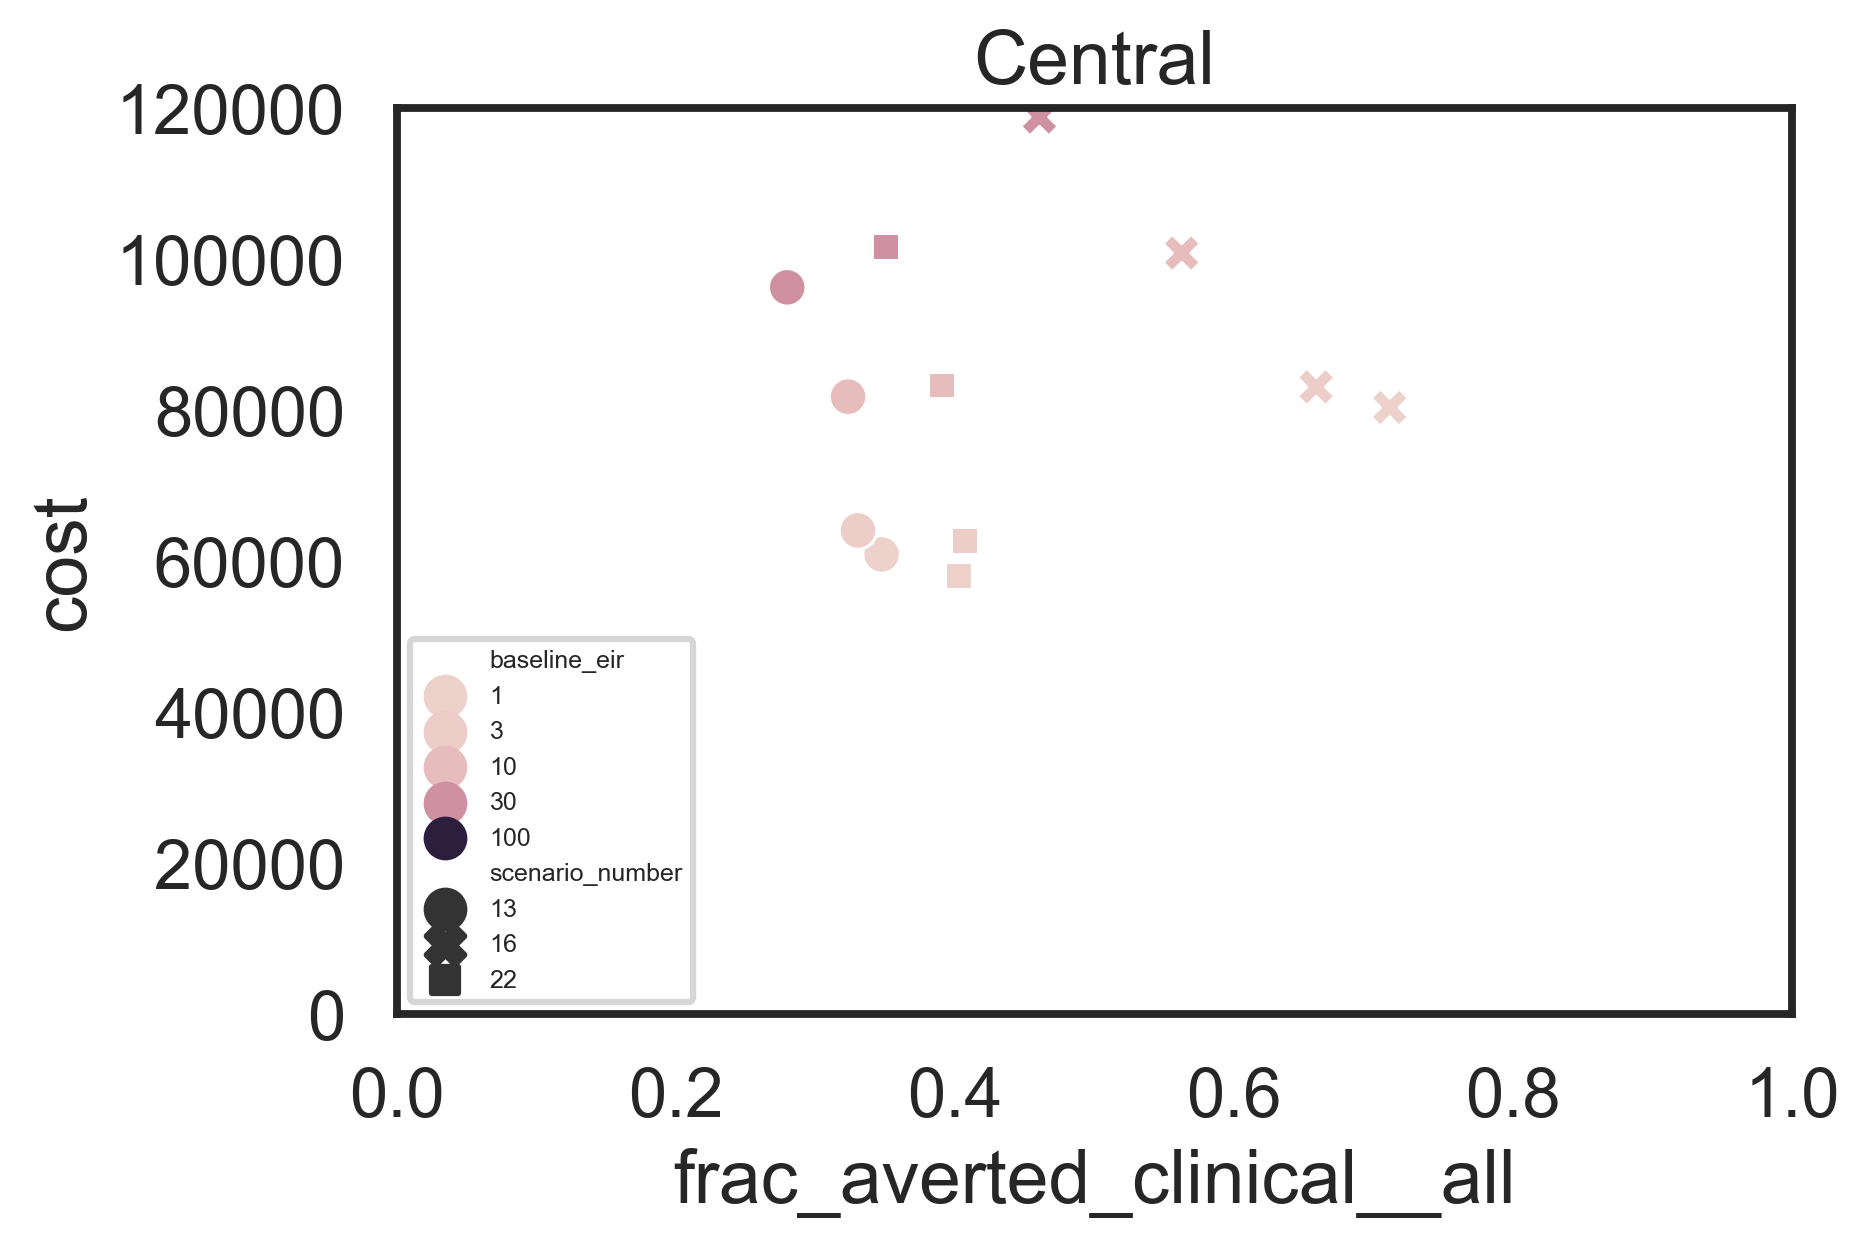

In [10]:
df_investigate = df[np.logical_and.reduce([df["archetype"]=="Central",
                                           np.in1d(df["scenario_number"], [13,16,22])])]
df_investigate = df_investigate[["baseline_eir", "scenario_number", "cost", "frac_averted_clinical__all"]]
df_investigate

plt.figure(dpi=300)
sns.scatterplot(data=df_investigate, x="frac_averted_clinical__all", y="cost", style="scenario_number", hue="baseline_eir")
plt.legend(fontsize=6, loc=3)
plt.xlim([0,1.0])
plt.ylim([0,120000])
plt.title("Central")

# Reframing costs as compared to doing nothing

In [11]:
# Cost of doing nothing?
base_cost = df[df["scenario_number"]==30][["archetype","baseline_eir","cost"]]
base_cost

,archetype,baseline_eir,cost
150,Central,1,64948.551998
151,Central,3,68757.512005
152,Central,10,89555.512005
153,Central,30,102885.344006
154,Central,100,122919.560010
430,Sahel,1,42942.044000
431,Sahel,3,54094.240002
432,Sahel,10,61635.367997
433,Sahel,30,71205.608500
434,Sahel,100,79808.173001


In [12]:
df = pd.merge(df,base_cost, on=["archetype", "baseline_eir"], suffixes=("","_BASELINE"))

In [13]:
df["cost_difference"] = df["cost"]-df["cost_BASELINE"]
df["cost_difference_per_capita"] = df["cost_difference"]/5000

Text(0.5, 1.0, 'Sahel')

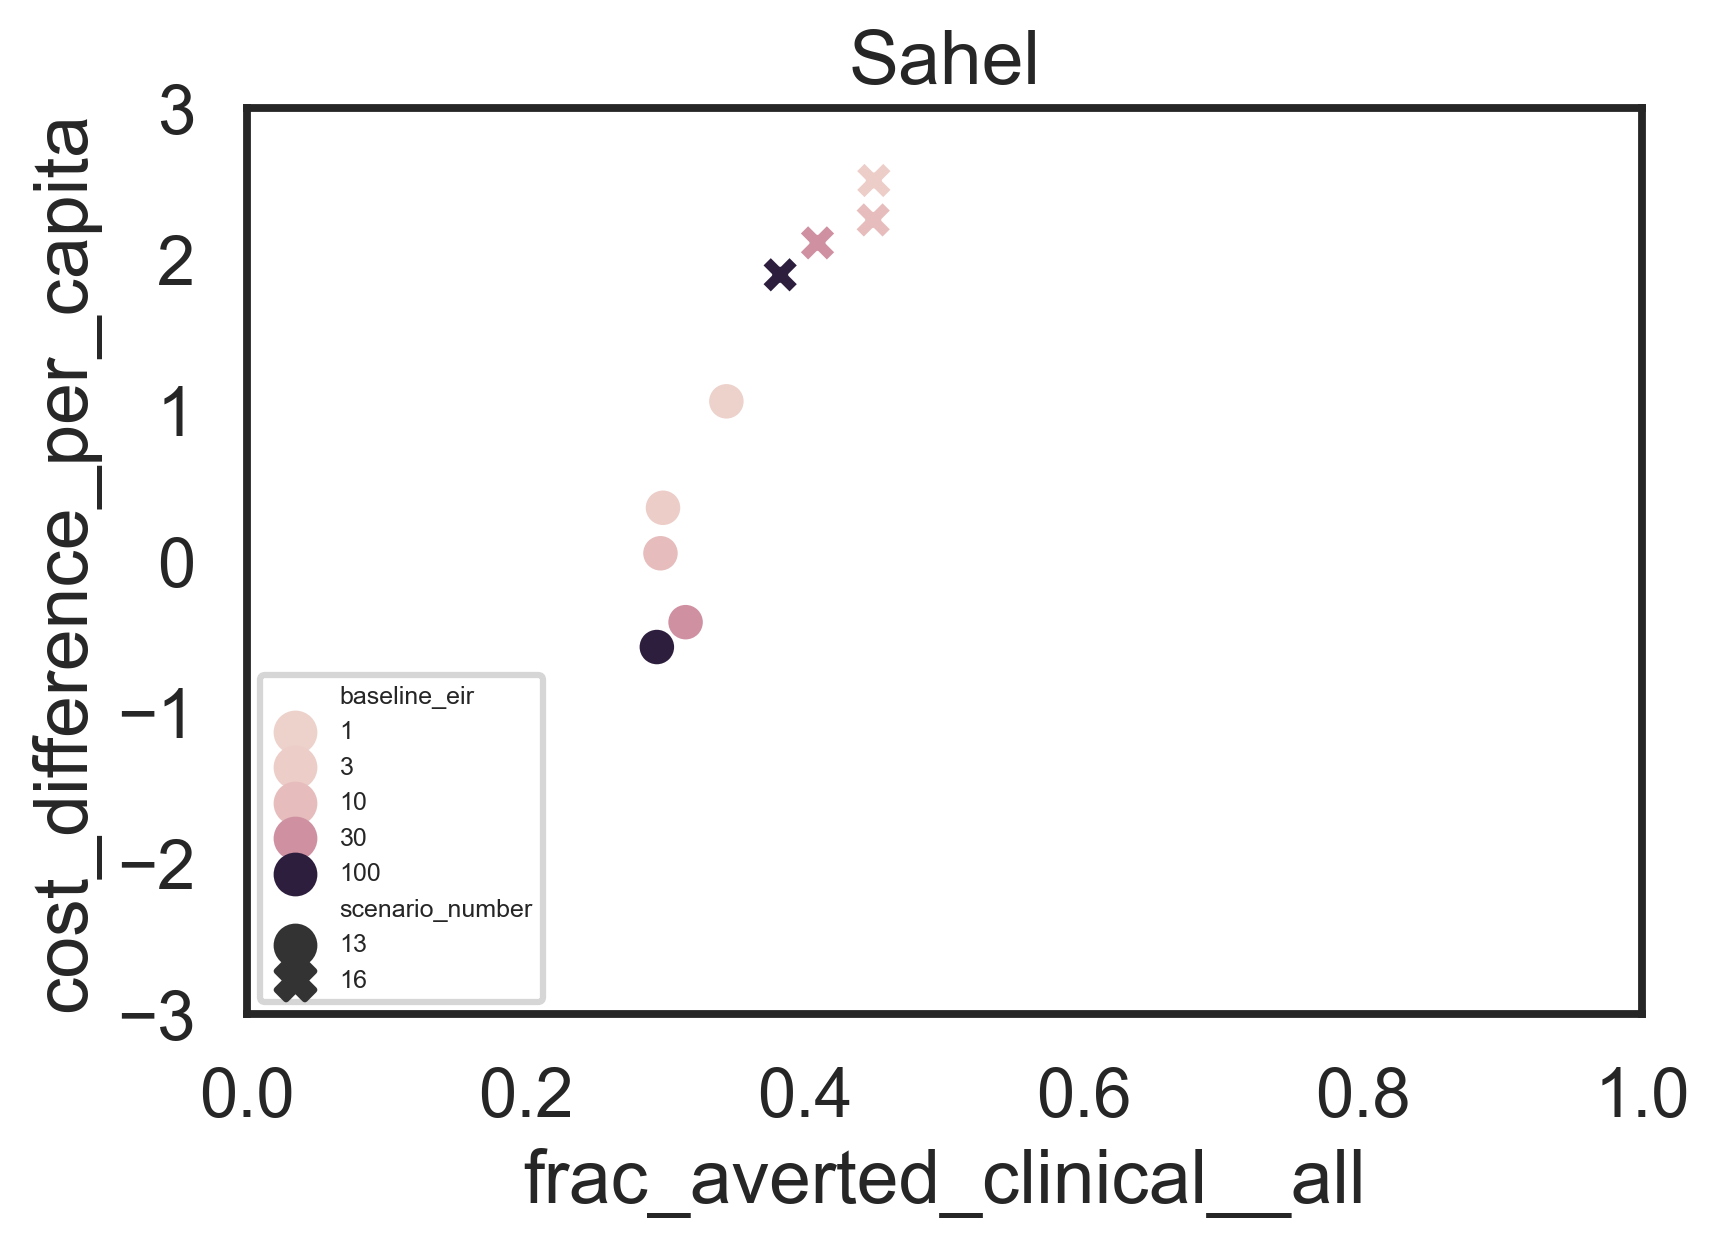

In [14]:
df_investigate = df[np.logical_and.reduce([df["archetype"]=="Sahel",
                                           np.in1d(df["scenario_number"], [13,16])])]
df_investigate = df_investigate[["baseline_eir", "scenario_number", "cost_difference_per_capita", "frac_averted_clinical__all"]]
df_investigate

plt.figure(dpi=300)
sns.scatterplot(data=df_investigate, x="frac_averted_clinical__all", y="cost_difference_per_capita", style="scenario_number", hue="baseline_eir")
plt.legend(fontsize=6, loc=3)
plt.xlim([0,1.0])
plt.ylim([-3,3])
plt.title("Sahel")

Text(0.5, 1.0, 'Southern')

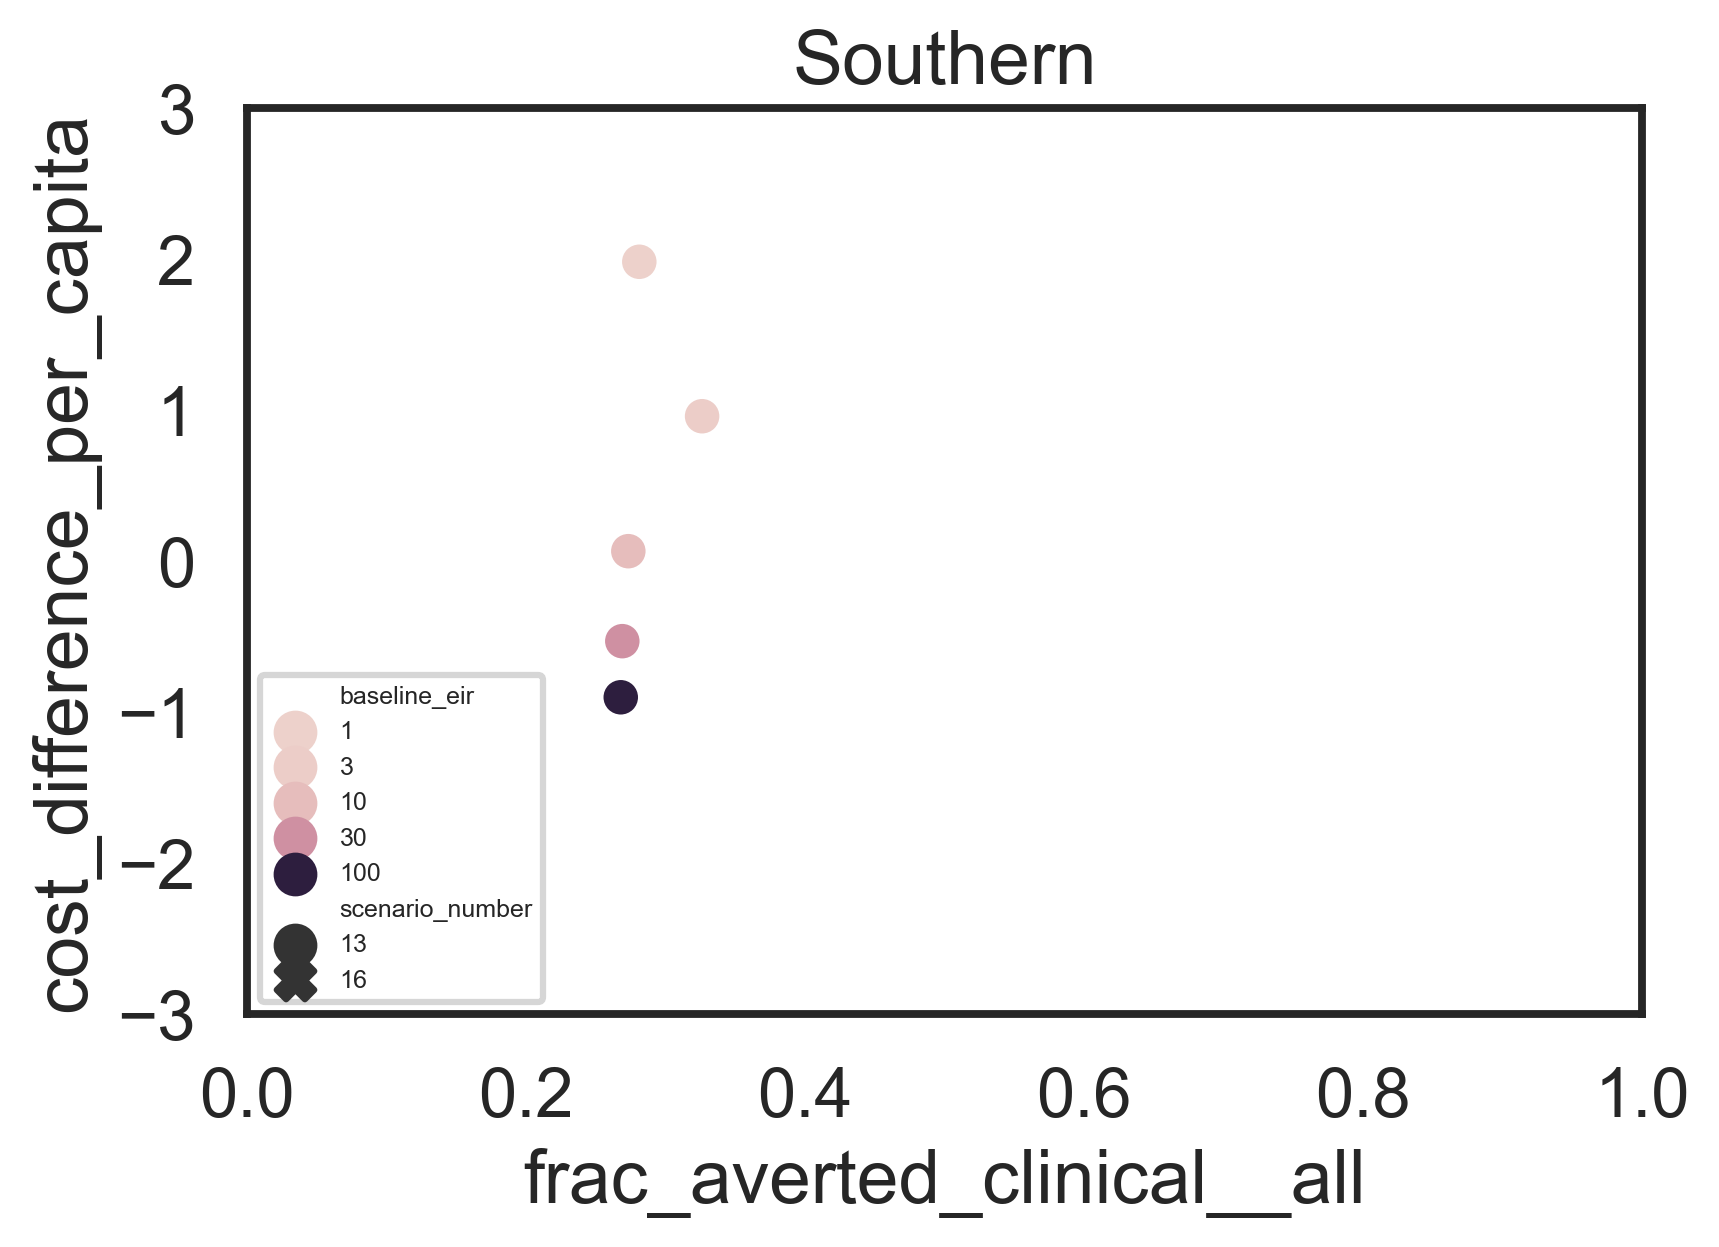

In [15]:
df_investigate = df[np.logical_and.reduce([df["archetype"]=="Southern",
                                           np.in1d(df["scenario_number"], [13,16])])]
df_investigate = df_investigate[["baseline_eir", "scenario_number", "cost_difference_per_capita", "frac_averted_clinical__all"]]
df_investigate

plt.figure(dpi=300)
sns.scatterplot(data=df_investigate, x="frac_averted_clinical__all", y="cost_difference_per_capita", style="scenario_number", hue="baseline_eir")
plt.legend(fontsize=6, loc=3)
plt.xlim([0,1.0])
plt.ylim([-3,3])
plt.title("Southern")

Text(0.5, 1.0, 'Central')

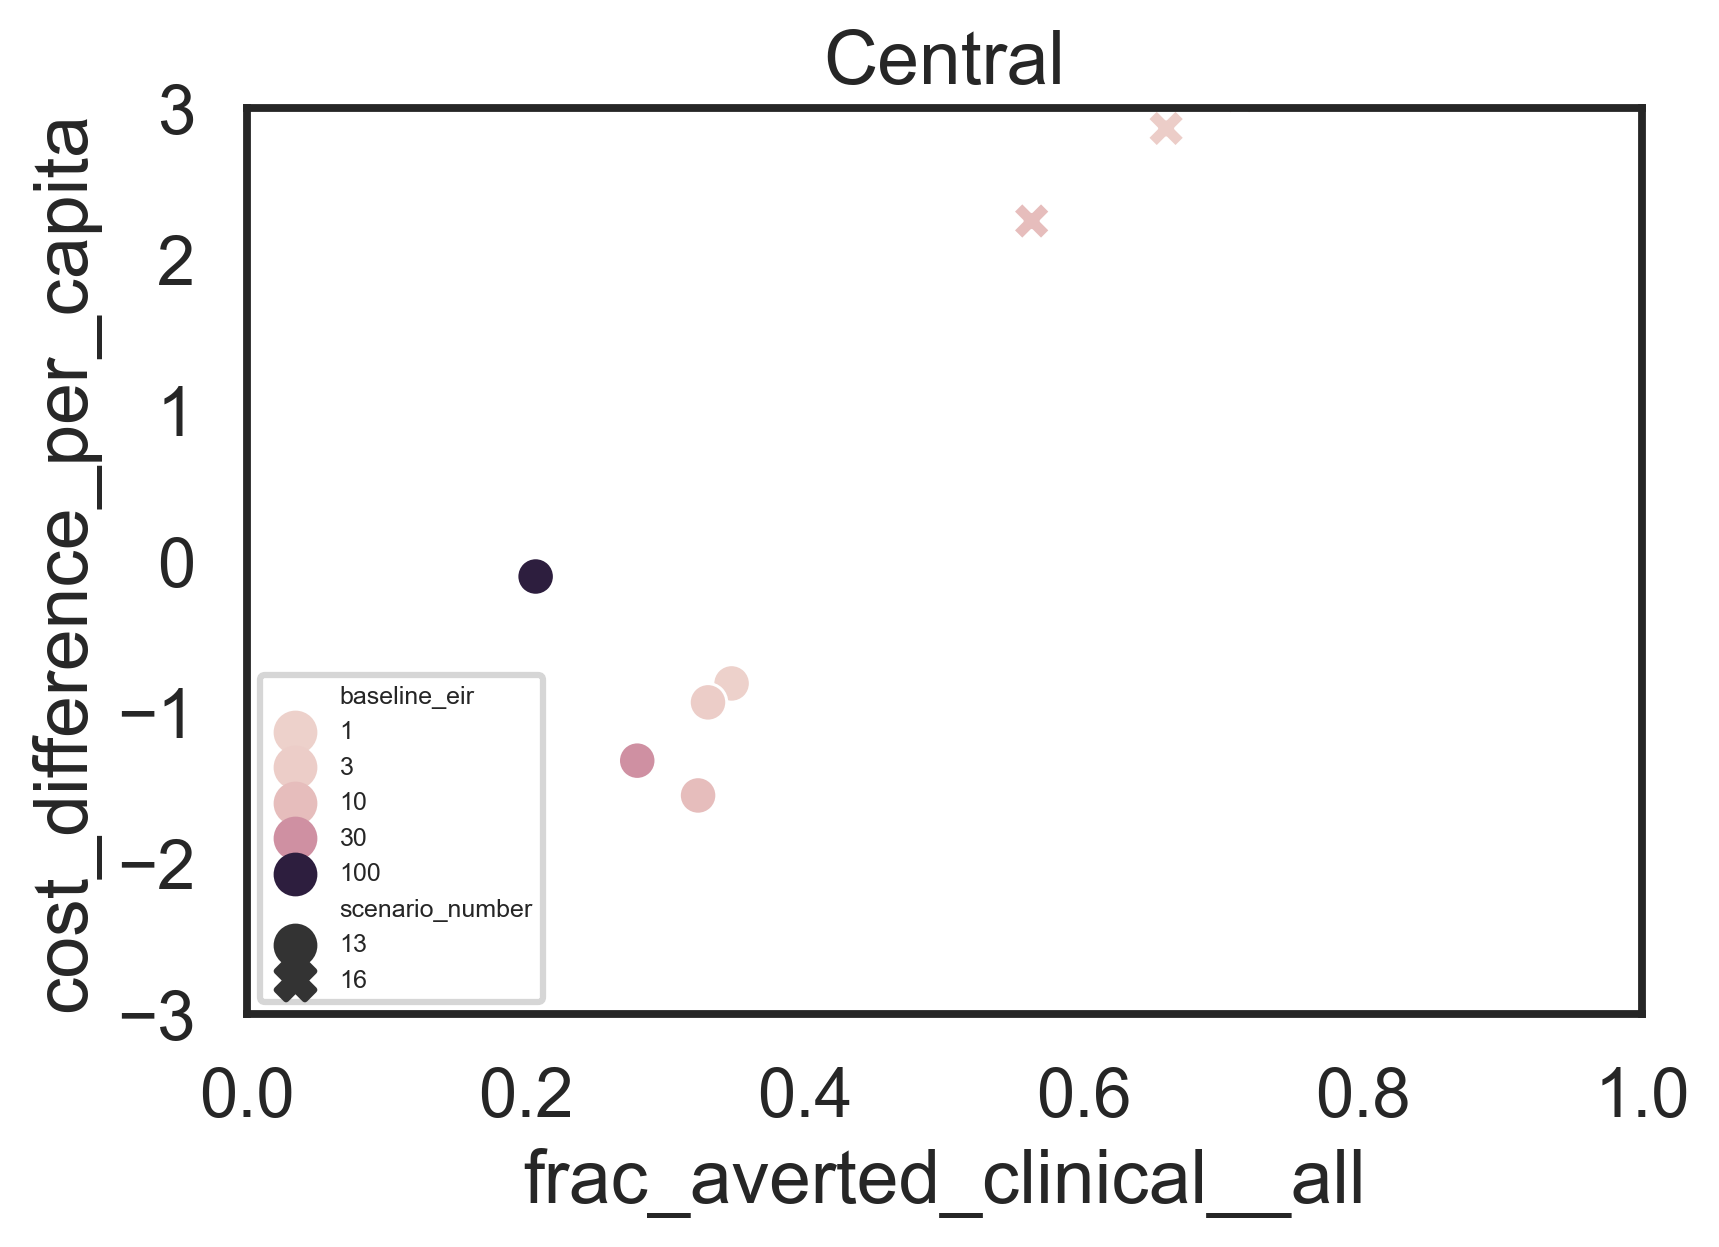

In [16]:
df_investigate = df[np.logical_and.reduce([df["archetype"]=="Central",
                                           np.in1d(df["scenario_number"], [13,16])])]
df_investigate = df_investigate[["baseline_eir", "scenario_number", "cost_difference_per_capita", "frac_averted_clinical__all"]]
df_investigate

plt.figure(dpi=300)
sns.scatterplot(data=df_investigate, x="frac_averted_clinical__all", y="cost_difference_per_capita", style="scenario_number", hue="baseline_eir")
plt.legend(fontsize=6, loc=3)
plt.xlim([0,1.0])
plt.ylim([-3,3])
plt.title("Central")